In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_rel
from statsmodels.stats.power import TTestPower

## Q1 Paired Sample t-test

This uses the data in the file paired_sampled_ttest.csv in the Data folder of the GitHub repository.

First we'll read in the data

In [2]:
# Read in paired sample t-test dataset
df_paired = pd.read_csv("../Data/paired_sampled_ttest.csv")

We'll take a quick look at the data, including the sample means of the columns in the dataset. We'll use the pandas describe function to do that.

In [3]:
# Calculate summary statistics of the data
df_paired.describe()

,xA,xB
count,40.000000,40.000000
mean,-0.472187,0.934351
std,4.342392,4.797588
min,-9.433588,-9.177824
25%,-3.066851,-1.815636
50%,0.285311,0.906282
75%,2.061572,3.803017
max,9.470712,12.524339


We can see that we have 40 observations and two columns of data, xA and xB, representing an A group and a B group of observations, respectively. The sample means of the two groups look different. The difference is mean group A - mean group B =  -0.472187 - 0.934351 = -1.406538. But is that difference statistically significant. We'll run a paired sample t-test to find out. We'll use the scipy.stats.ttest_rel function to run the paired sample t-test for us.

In [4]:
# Run a paired sample t-test
# We'll store the t-test result in an object, because we want to access
# a method on that object in Q2.
paired_ttest_result = ttest_rel(a=df_paired['xA'], b=df_paired['xB'])
paired_ttest_result

TtestResult(statistic=-6.869196967907021, pvalue=3.242061825264152e-08, df=39)

The t test-statistic for this t-test is -6.869. This is a large (in magnitude) value for a t test-statistic. Consequently, we expect the value to be statistically significant. The p-value is computed as 3.24e-08, so at the $\alpha=0.05$ level we reject the null hypothesis and accept the alternative hypothesis that there is a difference in means between the two populations from which these samples were drawn. This says that the data provides evidence (not proof) that the population means are different between the A group and the B group.

Note also the number of degrees-of-freedom is df=39 = 40-1. This is because we have 40 observations and we have had to estimaate one parameter in the test, the difference in means.

## Q2 Confidence Interval calculation for the difference in means

The TtestResult object returned by the scipy.stats.ttest_rel function that we used in Q1 has a method that calculates the confidence interval for us (default is the 95% confidence interval). Since we stored that t-test result in an object we can easily call the confidence interval calculation method. We'll do that now. 

In [5]:
# Calculate the 95% confidence interval for the difference in population means between the A group and the B group.
paired_ttest_result.confidence_interval()

ConfidenceInterval(low=-1.8207041761332543, high=-0.99237124169446)

We can see that the 95% confidence interval goes between -1.8207 and -0.9924, so it doesn't span 0. From the discussion in the Chapter 7 text, we can conclude, with high confidence that the difference in population means is negative. As discussed in the chapter text, we would expect this given how confidence intervals and hypothesis tests are connected. 

Let's calculate some more confidence intervals, but with different levels of confidence. First, we'll calculate a 99% confidence interval.

In [6]:
# Calculate the 99% confidence interval for the difference in population means between the A group and the B group.
paired_ttest_result.confidence_interval(confidence_level=0.99)

ConfidenceInterval(low=-1.9610103820483178, high=-0.8520650357793963)

The 99% confidence interval is between -1.9610 and -0.8521. It is a wider interval than the 95% confidence interval. We would expect this; to be more confident we have to allow for the possibility that the true difference in population means could be in a wider range of values. 

Let's now calculate the 80% confidence interval. This should be narrower than the 95% confidence interval.

In [7]:
# Calculate the 80% confidence interval for the difference in population means between the A group and the B group.
paired_ttest_result.confidence_interval(confidence_level=0.80)

ConfidenceInterval(low=-1.6734709241352164, high=-1.1396044936924978)

The 80% confidence interval spans between -1.6735 and -1.1396, so it is indeed narrower than the 95% confidence interval.

## Q3 Paired Sample

Here we are going to calculate the sample size need to achieve a power of 0.8 (80%) in a paired t-test when the effec size is 0.3, which is the lower end of the expected effect size. We'll do the calculation in two different ways, because it is instructive to compare them. In the first method we'll compute the power for a sequence of different sample sizes and then plot the power against sample size. We can then read off from the plot what is the sample size that first gives us a power of 0.8 (or larger). We'll use the power method of the statsmodels.stats.power.TTestPower class to do the power calculations for us.

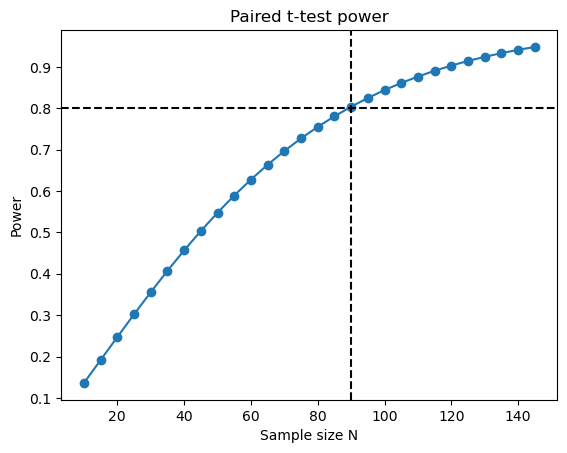

In [8]:
# Create the sequence of sample sizes for which we'll calculate the power
n_seq = np.arange(start=10, stop=150, step=5)

# Calculate the power for the sequence of sample sizes.
# We'll do this as a lis comprehension
power_seq = [TTestPower().power(effect_size=0.3, nobs=n, alpha=0.05, df=n-1, alternative='two-sided') for n in n_seq]

# Plot the power against sample size
fig, ax = plt.subplots()
plt.plot(n_seq, power_seq, marker='o')
ax.axhline(0.8, linestyle='--', color='black')
ax.axvline(90, linestyle='--', color='black')
plt.title('Paired t-test power')
plt.xlabel('Sample size N')
plt.ylabel('Power')
plt.show()

I have added a horizontal dashed line to the plot at power=0.8. This helps to read off the required sample size that first gives us a power of 0.8. I have also added a vertical dashed line to the plot at $N=90$, as this is the sample size that appears to first give us a power of 0.8 or larger.

We can do this calculation of the required sample size more efficiently is we use the solve_power function of the TTestPower class, like we did in the code example in the main text of Chapter 7. To run this is for a paired t-test is very similar to how we did the sample size calculation for a two-sample t-test in the main text.

In [9]:
# Run the sample size calculation
print("Required sample size = ", TTestPower().solve_power(effect_size=0.3, nobs=None, alpha=0.05, power=0.8, alternative='two-sided'))

Required sample size =  89.14936654995549


We can see that the sample size calculation says we need a sample size of 89.15 to achieve the desired 80% power. Since the sample size is an integer, this says we need a sample size of at least $N=90$, in agreement with our previous way of estimating the required sample size.

Now you may be wondering why the sample size calculation says we need 90 observations to achieve a power of 80%, when our dataset in Q1 showed a statistically significant difference in the means with just 40 observations. The answer is the effect size present in the data in Q1 is larger than 0.3. In other words, when we have been doing the sample size calculation in this question, we have been using a lower (more conservative estimate) of the effect size. This is to emphasize that, when doing a priori power and sample size calculations, we are assuming what the effect size will be, and in this case I deliberately chose to do the sample size calculations with a small effect size to be on the safe side.